### Meteostat

In [2]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor
from datetime import datetime
from meteostat import Point, Daily

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('processed/442100110323_daily.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01,1.704497
1,2019-01-02,1.804380
2,2019-01-03,1.606232
3,2019-01-04,1.220510
4,2019-01-05,0.980424
...,...,...
1973,2024-05-27,64.703542
1974,2024-05-28,63.751474
1975,2024-05-29,68.610622
1976,2024-05-30,65.846084


In [4]:
# start dan end date meteostat
start = datetime(2019, 1, 1)
end = datetime(2024, 5, 31)

# locatie
sumbawa_besar = (-8.4932, 117.4202)

# data meteostat
point = Point(sumbawa_besar[0], sumbawa_besar[1], 0)
data = Daily(point, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,25.7,24.8,30.2,<NA>,<NA>,<NA>,6.4,<NA>,1008.9,<NA>
2019-01-02,26.0,24.1,29.2,<NA>,<NA>,<NA>,5.4,<NA>,1009.2,<NA>
2019-01-03,24.6,24.0,27.3,<NA>,<NA>,<NA>,4.1,<NA>,1010.3,<NA>
2019-01-04,26.2,23.0,29.8,<NA>,<NA>,<NA>,6.9,<NA>,1011.4,<NA>
2019-01-05,26.9,23.6,30.2,<NA>,<NA>,<NA>,6.3,<NA>,1011.7,<NA>
...,...,...,...,...,...,...,...,...,...,...
2024-05-27,28.3,24.4,34.0,0.1,<NA>,<NA>,9.8,<NA>,1009.9,<NA>
2024-05-28,28.2,24.1,33.9,0.0,<NA>,<NA>,8.0,<NA>,1009.4,<NA>
2024-05-29,29.0,24.2,33.0,1.6,<NA>,<NA>,7.7,<NA>,1009.1,<NA>


DEPRECATED FOR DAILY only on Hourly
| Column   | Description                                                                                   | Type      |
|----------|-----------------------------------------------------------------------------------------------|-----------|
| station  | The Meteostat ID of the weather station (only if query refers to multiple stations)           | String    |
| time     | The datetime of the observation                                                               | Datetime64|
| temp     | The air temperature in °C                                                                     | Float64   |
| dwpt     | The dew point in °C                                                                           | Float64   |
| rhum     | The relative humidity in percent (%)                                                          | Float64   |
| prcp     | The one hour precipitation total in mm                                                        | Float64   |
| snow     | The snow depth in mm                                                                          | Float64   |
| wdir     | The average wind direction in degrees (°)                                                     | Float64   |
| wspd     | The average wind speed in km/h                                                                | Float64   |
| wpgt     | The peak wind gust in km/h                                                                    | Float64   |
| pres     | The average sea-level air pressure in hPa                                                     | Float64   |
| tsun     | The one hour sunshine total in minutes (m)                                                    | Float64   |
| coco     | The weather condition code                                                                    | Float64   |


In [5]:
data.isna().sum()

tavg       0
tmin       0
tmax       0
prcp    1235
snow    1978
wdir    1978
wspd       0
wpgt    1978
pres       0
tsun    1978
dtype: int64

In [6]:
data.drop(columns=['prcp', 'snow', 'wpgt', 'tsun'], inplace=True)
data.isna().sum()

tavg       0
tmin       0
tmax       0
wdir    1978
wspd       0
pres       0
dtype: int64

In [7]:
data

,tavg,tmin,tmax,wdir,wspd,pres
time,,,,,,
2019-01-01,25.7,24.8,30.2,<NA>,6.4,1008.9
2019-01-02,26.0,24.1,29.2,<NA>,5.4,1009.2
2019-01-03,24.6,24.0,27.3,<NA>,4.1,1010.3
2019-01-04,26.2,23.0,29.8,<NA>,6.9,1011.4
2019-01-05,26.9,23.6,30.2,<NA>,6.3,1011.7
...,...,...,...,...,...,...
2024-05-27,28.3,24.4,34.0,<NA>,9.8,1009.9
2024-05-28,28.2,24.1,33.9,<NA>,8.0,1009.4
2024-05-29,29.0,24.2,33.0,<NA>,7.7,1009.1


sebelum outlier handling


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

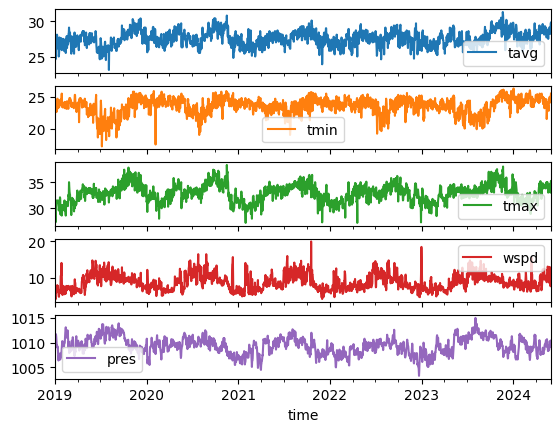

In [52]:
print("sebelum outlier handling")
data.drop('wdir', axis=1, inplace=True)
data.plot(subplots=True)

sesudah IQR filtering


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

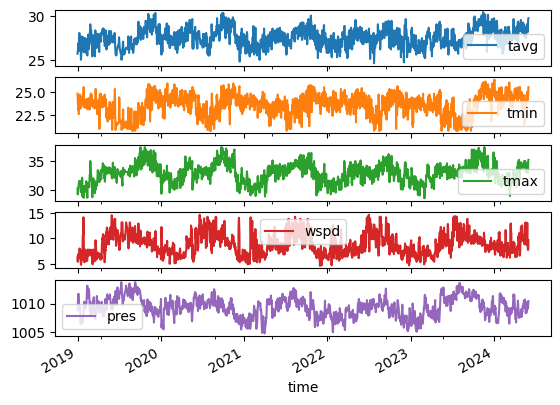

In [56]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


print("sesudah IQR filtering")
data_clean = data[~outlier.any(axis=1)]
data_clean.plot(subplots=True)

In [ ]:
# gabung data weather dengan data daily
# data weather merupakan data perjam, sedangkan data daily merupakan data 1 jaman
# gabungkan data perjam ke data weather sesuai dengan READ_DATE di data perjam 

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
# set index 
df.set_index('READ_DATE', inplace=True)

# gabungkan
df = df.join(data_clean, how='left')
df

,KWH_EXP,tavg,tmin,tmax,wdir,wspd,pres
READ_DATE,,,,,,,
2019-01-01,1.704497,25.7,24.8,30.2,<NA>,6.4,1008.9
2019-01-02,1.804380,26.0,24.1,29.2,<NA>,5.4,1009.2
2019-01-03,1.606232,24.6,24.0,27.3,<NA>,4.1,1010.3
2019-01-04,1.220510,26.2,23.0,29.8,<NA>,6.9,1011.4
2019-01-05,0.980424,26.9,23.6,30.2,<NA>,6.3,1011.7
...,...,...,...,...,...,...,...
2024-05-27,64.703542,28.3,24.4,34.0,<NA>,9.8,1009.9
2024-05-28,63.751474,28.2,24.1,33.9,<NA>,8.0,1009.4
2024-05-29,68.610622,29.0,24.2,33.0,<NA>,7.7,1009.1


In [9]:
df.isna().sum()

KWH_EXP       0
tavg          0
tmin          0
tmax          0
wdir       1978
wspd          0
pres          0
dtype: int64

In [10]:
df.interpolate(method='linear', inplace=True)
df.isna().sum()

KWH_EXP       0
tavg          0
tmin          0
tmax          0
wdir       1978
wspd          0
pres          0
dtype: int64

In [11]:
df.to_csv('processed/442100110323_daily_meteostat.csv')

<Axes: xlabel='READ_DATE'>

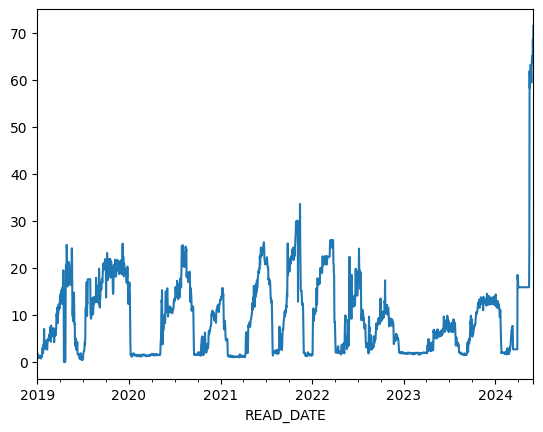

In [12]:
df['KWH_EXP'].plot()

# LEGACY (unused)

In [13]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [14]:
df_features

,KWH_EXP,tavg,tmin,tmax,wdir,wspd,pres,lag_1,lag_6,lag_12,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1.704497,25.7,24.8,30.2,0.0,6.4,1008.9,0.000000,0.000000,0.000000,...,1.0,8.660254e-01,0.5,0.120537,0.992709,0.017166,0.999853,7.908263,-0.073244,-0.073349
2019-01-02,1.804380,26.0,24.1,29.2,0.0,5.4,1009.2,1.704497,0.000000,0.000000,...,1.0,8.660254e-01,-0.5,0.120537,0.992709,0.034328,0.999411,7.908263,-0.076864,-0.073349
2019-01-03,1.606232,24.6,24.0,27.3,0.0,4.1,1010.3,1.804380,0.000000,0.000000,...,1.0,1.224647e-16,-1.0,0.120537,0.992709,0.051479,0.998674,7.908263,-0.191035,-0.073349
2019-01-04,1.220510,26.2,23.0,29.8,0.0,6.9,1011.4,1.606232,0.000000,0.000000,...,1.0,-8.660254e-01,-0.5,0.120537,0.992709,0.068615,0.997643,7.908263,-0.154217,-0.073349
2019-01-05,0.980424,26.9,23.6,30.2,0.0,6.3,1011.7,1.220510,0.000000,0.000000,...,1.0,-8.660254e-01,0.5,0.120537,0.992709,0.085731,0.996318,7.908263,-0.131405,-0.073349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,64.703542,28.3,24.4,34.0,0.0,9.8,1009.9,65.141821,62.866259,24.238801,...,-1.0,0.000000e+00,1.0,0.464723,-0.885456,0.565345,-0.824855,7.908263,0.225358,-0.073349
2024-05-28,63.751474,28.2,24.1,33.9,0.0,8.0,1009.4,64.703542,61.253662,61.890887,...,-1.0,8.660254e-01,0.5,0.464723,-0.885456,0.551102,-0.834438,7.908263,0.291845,-0.073349
2024-05-29,68.610622,29.0,24.2,33.0,0.0,7.7,1009.1,63.751474,59.444835,58.296876,...,-1.0,8.660254e-01,-0.5,0.464723,-0.885456,0.536696,-0.843776,7.908263,0.374563,-0.073349


In [15]:
df_features.to_csv('processed/442100110323_hourly_meteostat_features.csv')

### Hourly

In [16]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('processed/442100110323_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.402650
1,2019-01-01 01:00:00,2.408348
2,2019-01-01 02:00:00,2.406840
3,2019-01-01 03:00:00,2.256511
4,2019-01-01 04:00:00,2.065598
...,...,...
47467,2024-05-31 19:00:00,65.205495
47468,2024-05-31 20:00:00,65.520523
47469,2024-05-31 21:00:00,66.389436
47470,2024-05-31 22:00:00,69.132420


In [18]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)
df_weather.to_csv('processed/weather_2019_2024_standard.csv', index=False)
df_weather

,Tanggal,Tavg,RH_avg,RR,ss
0,2019-01-01,25.7,96.0,12.9,7.5
1,2019-01-02,25.9,90.0,42.7,6.7
2,2019-01-03,24.9,94.0,0.5,0.1
3,2019-01-04,25.8,88.0,34.6,0.1
4,2019-01-05,26.7,88.0,2.1,3.2
...,...,...,...,...,...
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0


In [19]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 1 jaman
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 1 jaman dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [20]:
df.set_index('READ_DATE', inplace=True)
df.drop(columns=['READ_DATE_day'], inplace=True)

In [21]:
df.isna().sum()

KWH_EXP    0
Tavg       0
RH_avg     0
RR         0
ss         0
dtype: int64

In [22]:
df.to_csv('processed/442100110323_hourly_weather.csv')

In [23]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [24]:
df_features

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_6,lag_12,lag_24,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.402650,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.402650,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.209330,0.000425
2019-01-01 01:00:00,2.408348,25.7,96.0,12.9,7.5,2.402650,0.000000,0.000000,0.000000,2.408348,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.090785,0.000425
2019-01-01 02:00:00,2.406840,25.7,96.0,12.9,7.5,2.408348,0.000000,0.000000,0.000000,2.406840,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.082446,0.000425
2019-01-01 03:00:00,2.256511,25.7,96.0,12.9,7.5,2.406840,0.000000,0.000000,0.000000,2.256511,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.077927,0.000425
2019-01-01 04:00:00,2.065598,25.7,96.0,12.9,7.5,2.256511,0.000000,0.000000,0.000000,2.065598,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.115159,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,65.205495,29.8,68.0,0.0,10.8,65.268262,73.044454,75.646947,60.058114,65.205495,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,-0.086264,0.000425
2024-05-31 20:00:00,65.520523,29.8,68.0,0.0,10.8,65.205495,71.052517,76.229854,63.987306,65.520523,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.074562,0.000425
2024-05-31 21:00:00,66.389436,29.8,68.0,0.0,10.8,65.520523,68.469683,73.488070,65.499925,66.389436,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.096503,0.000425


In [25]:
df_features.to_csv('processed/442100110323_hourly_weather_features.csv')

In [26]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv('processed/442100110323_hourly.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.402650
1,2019-01-01 01:00:00,2.408348
2,2019-01-01 02:00:00,2.406840
3,2019-01-01 03:00:00,2.256511
4,2019-01-01 04:00:00,2.065598
...,...,...
47467,2024-05-31 19:00:00,65.205495
47468,2024-05-31 20:00:00,65.520523
47469,2024-05-31 21:00:00,66.389436
47470,2024-05-31 22:00:00,69.132420


In [28]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)
df_weather.to_csv('processed/weather_2019_2024_standard.csv', index=False)
df_weather

,Tanggal,Tavg,RH_avg,RR,ss
0,2019-01-01,25.7,96.0,12.9,7.5
1,2019-01-02,25.9,90.0,42.7,6.7
2,2019-01-03,24.9,94.0,0.5,0.1
3,2019-01-04,25.8,88.0,34.6,0.1
4,2019-01-05,26.7,88.0,2.1,3.2
...,...,...,...,...,...
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0


In [29]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 1 jaman
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 1 jaman dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [30]:
df.set_index('READ_DATE', inplace=True)
df.drop(columns=['READ_DATE_day'], inplace=True)

In [31]:
df.isna().sum()

KWH_EXP    0
Tavg       0
RH_avg     0
RR         0
ss         0
dtype: int64

In [32]:
df.to_csv('processed/442100110323_hourly_weather.csv')

In [33]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features(lags=[1, 6, 12, 24])
      .create_rolling_features(windows=[1, 6, 12, 24])
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [34]:
df_features

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_6,lag_12,lag_24,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.402650,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.402650,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.209330,0.000425
2019-01-01 01:00:00,2.408348,25.7,96.0,12.9,7.5,2.402650,0.000000,0.000000,0.000000,2.408348,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,-0.090785,0.000425
2019-01-01 02:00:00,2.406840,25.7,96.0,12.9,7.5,2.408348,0.000000,0.000000,0.000000,2.406840,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.082446,0.000425
2019-01-01 03:00:00,2.256511,25.7,96.0,12.9,7.5,2.406840,0.000000,0.000000,0.000000,2.256511,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.077927,0.000425
2019-01-01 04:00:00,2.065598,25.7,96.0,12.9,7.5,2.256511,0.000000,0.000000,0.000000,2.065598,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.932104,0.115159,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,65.205495,29.8,68.0,0.0,10.8,65.268262,73.044454,75.646947,60.058114,65.205495,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,-0.086264,0.000425
2024-05-31 20:00:00,65.520523,29.8,68.0,0.0,10.8,65.205495,71.052517,76.229854,63.987306,65.520523,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.074562,0.000425
2024-05-31 21:00:00,66.389436,29.8,68.0,0.0,10.8,65.520523,68.469683,73.488070,65.499925,66.389436,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.932104,0.096503,0.000425


In [35]:
df_features.to_csv('processed/442100110323_hourly_weather_features.csv')

### Standard

In [36]:
import pandas as pd
import warnings
from modules.FeatureExtractor import FeatureExtractor

warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('processed/442100110323_standard.csv')
df

,READ_DATE,KWH_EXP
0,2019-01-01 00:00:00,2.334143
1,2019-01-01 00:15:00,2.344050
2,2019-01-01 00:30:00,2.500311
3,2019-01-01 00:45:00,2.432096
4,2019-01-01 01:00:00,2.388465
...,...,...
189883,2024-05-31 22:45:00,69.132420
189884,2024-05-31 23:00:00,69.132420
189885,2024-05-31 23:15:00,68.774401
189886,2024-05-31 23:30:00,68.765215


In [38]:
df_weather = pd.read_csv('processed/weather_2019_2024_standard.csv')

df_weather.interpolate(method='linear', inplace=True)

In [39]:
# gabung data weather dengan data daily
# data weather merupakan data harian, sedangkan data daily merupakan data 15 menitan
# sehingga data weather akan digabung ke data harian dengan cara mengflatkan data 15 menitan dalam 1 hari dengan data weather

df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df_weather['Tanggal'] = pd.to_datetime(df_weather['Tanggal'])

df['READ_DATE_day'] = df['READ_DATE'].dt.date
df_weather['Tanggal'] = df_weather['Tanggal'].dt.date

df = pd.merge(df, df_weather, how='left', left_on='READ_DATE_day', right_on='Tanggal')
df.drop(columns=['Tanggal'], inplace=True)

In [40]:
df.set_index('READ_DATE', inplace=True)

In [41]:
df.isna().sum()

KWH_EXP          0
READ_DATE_day    0
Tavg             0
RH_avg           0
RR               0
ss               0
dtype: int64

In [42]:
df.to_csv('processed/442100110323_standard_weather.csv')

In [43]:
fe = FeatureExtractor(df, 'KWH_EXP')
df_features = (
    fe.create_lag_features()
      .create_rolling_features()
      .create_expanding_features()
      .create_date_features()
      .create_cyclical_features()
      .create_decomposition_features()
      .fill_missing_values()
      .get_features()
)

In [44]:
df_features

,KWH_EXP,READ_DATE_day,Tavg,RH_avg,RR,ss,lag_1,lag_3,lag_7,lag_28,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.334143,2019-01-01,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.017837,-0.000047
2019-01-01 00:15:00,2.344050,2019-01-01,25.7,96.0,12.9,7.5,2.334143,0.000000,0.000000,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.011514,-0.000047
2019-01-01 00:30:00,2.500311,2019-01-01,25.7,96.0,12.9,7.5,2.344050,0.000000,0.000000,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.008583,-0.000047
2019-01-01 00:45:00,2.432096,2019-01-01,25.7,96.0,12.9,7.5,2.500311,2.334143,0.000000,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.064360,-0.000047
2019-01-01 01:00:00,2.388465,2019-01-01,25.7,96.0,12.9,7.5,2.432096,2.344050,0.000000,0.000000,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.045630,-0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,69.132420,2024-05-31,29.8,68.0,0.0,10.8,69.132420,69.132420,65.469139,63.243948,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.035359,-0.000047
2024-05-31 23:00:00,69.132420,2024-05-31,29.8,68.0,0.0,10.8,69.132420,69.132420,65.559856,63.452988,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.003232,-0.000047
2024-05-31 23:15:00,68.774401,2024-05-31,29.8,68.0,0.0,10.8,69.132420,69.132420,66.302510,63.512601,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,0.030413,-0.000047


In [45]:
df_features.to_csv('processed/442100110323_standard_weather_features.csv')